# Prediction Model

In [1]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 276 kB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='white')

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [44]:
df = pd.read_csv('house_price.txt', encoding='utf-8-sig')

In [45]:
df.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,comes_furnished,laundry_options,parking_options
0,1130,apartment,684,1,1.0,0,0,0,0,0,w/d in unit,carport
1,1190,condo,2190,4,2.0,1,1,1,0,0,NaN,NaN
2,1333,apartment,805,2,1.5,1,1,1,0,0,NaN,NaN
3,2440,apartment,850,1,1.0,0,1,1,0,0,w/d in unit,NaN
4,1250,condo,1500,3,2.0,0,0,1,0,1,w/d in unit,off-street parking


## Treino e teste

In [46]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [47]:
train.shape

(4000, 12)

In [48]:
test.shape

(1000, 12)

## Transformação de dados

In [49]:
feat_num = ['price', 'sqfeet', 'beds', 'baths']
feat_cat = ['type', 'laundry_options', 'parking_options']
feat_cat2 = ['comes_furnished', 'wheelchair_access', 'smoking_allowed', 'dogs_allowed', 'cats_allowed']

In [50]:
target = 'price'

### Z-score transformation

In [51]:
z_score = StandardScaler()
def std_z_scale(df,col):
  df[col] = z_score.fit_transform(df[[col]])

In [52]:
for col in feat_num:
  std_z_scale(train, col)
  std_z_scale(test, col)

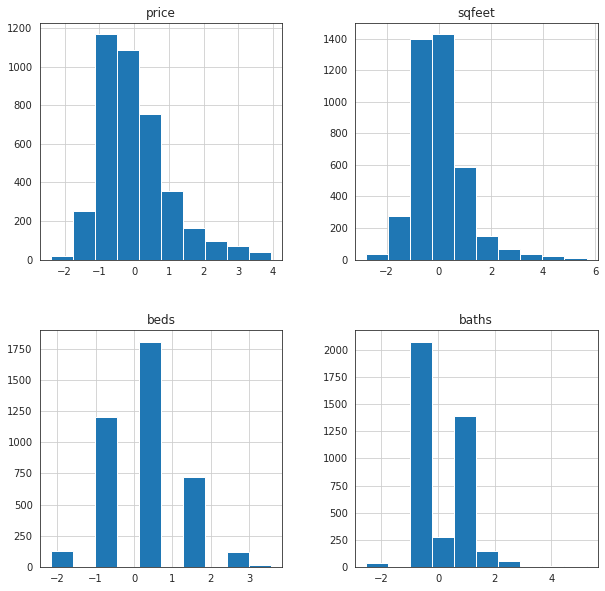

In [53]:
train[feat_num].hist(figsize=(10,10), bins=10)
plt.show()

In [54]:
train.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,comes_furnished,laundry_options,parking_options
4227,-0.604730,house,-0.305271,1.277484,0.050610,0,1,1,1,0,w/d hookups,attached garage
4676,-0.577131,apartment,0.135287,0.125560,0.915746,1,1,0,0,0,w/d hookups,NaN
800,0.042804,apartment,-0.826453,-1.026365,-0.814525,0,0,1,0,0,NaN,NaN
3671,-0.617469,apartment,-0.745828,0.125560,-0.814525,1,1,1,0,0,laundry in bldg,off-street parking
4193,-1.029343,apartment,-0.515471,0.125560,-0.814525,0,0,0,0,0,w/d hookups,carport


In [55]:
train = train.reset_index()
test = test.reset_index()

In [56]:
train = train.drop(columns='index')
test = test.drop(columns='index')

In [57]:
train.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,comes_furnished,laundry_options,parking_options
0,-0.604730,house,-0.305271,1.277484,0.050610,0,1,1,1,0,w/d hookups,attached garage
1,-0.577131,apartment,0.135287,0.125560,0.915746,1,1,0,0,0,w/d hookups,NaN
2,0.042804,apartment,-0.826453,-1.026365,-0.814525,0,0,1,0,0,NaN,NaN
3,-0.617469,apartment,-0.745828,0.125560,-0.814525,1,1,1,0,0,laundry in bldg,off-street parking
4,-1.029343,apartment,-0.515471,0.125560,-0.814525,0,0,0,0,0,w/d hookups,carport


In [58]:
test.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,comes_furnished,laundry_options,parking_options
0,0.621224,apartment,-0.309702,-1.003150,-0.786365,1,1,0,1,0,w/d in unit,detached garage
1,-1.099866,house,4.154907,2.448054,2.681617,1,1,1,0,1,w/d hookups,NaN
2,0.593636,apartment,-0.283610,0.147251,-0.786365,1,1,1,0,0,laundry on site,off-street parking
3,0.795243,apartment,-0.741667,-1.003150,-0.786365,1,1,1,1,0,w/d in unit,detached garage
4,0.795243,flat,1.107957,0.147251,0.947626,1,1,0,0,0,w/d hookups,attached garage


## Variável categórica

In [59]:
one_hot = OneHotEncoder()

In [60]:
for col in feat_cat: 
  temp = pd.DataFrame(one_hot.fit_transform(train[[col]]).toarray(),columns=one_hot.get_feature_names([col]))
  train = pd.concat([train, temp], axis=1, join='inner')

  temp = pd.DataFrame(one_hot.fit_transform(test[[col]]).toarray(),columns=one_hot.get_feature_names([col]))
  test = pd.concat([test, temp], axis=1, join='inner')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [61]:
train.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,comes_furnished,laundry_options,parking_options,type_apartment,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_loft,type_manufactured,type_townhouse,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,laundry_options_nan,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking,parking_options_nan
0,-0.604730,house,-0.305271,1.277484,0.050610,0,1,1,1,0,w/d hookups,attached garage,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.577131,apartment,0.135287,0.125560,0.915746,1,1,0,0,0,w/d hookups,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.042804,apartment,-0.826453,-1.026365,-0.814525,0,0,1,0,0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.617469,apartment,-0.745828,0.125560,-0.814525,1,1,1,0,0,laundry in bldg,off-street parking,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.029343,apartment,-0.515471,0.125560,-0.814525,0,0,0,0,0,w/d hookups,carport,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


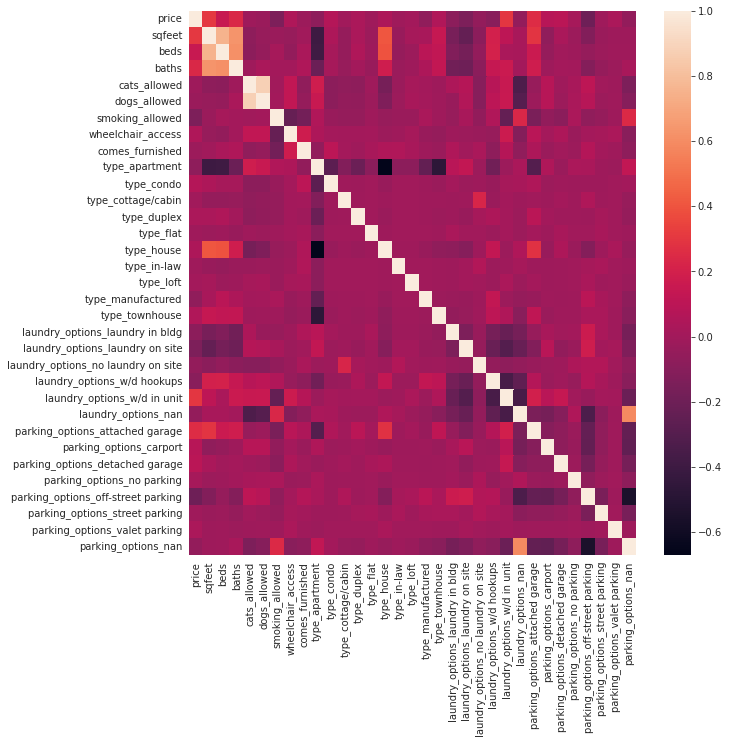

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr())

In [63]:
train = train.drop(columns = feat_cat)
test = test.drop(columns = feat_cat)

In [70]:
test['parking_options_valet parking'] = 0
test['type_in-law'] = 0

## Regressão multipla

In [71]:
model = LinearRegression(fit_intercept=1)

In [72]:
model.fit(train.drop(target, axis=1), train[target])

LinearRegression(fit_intercept=1)

In [73]:
y_pred_train = model.predict(train.drop(target, axis=1))
y_pred_test = model.predict(test.drop(target, axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


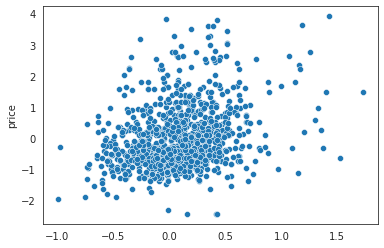

In [74]:
sns.scatterplot(x = y_pred_test, y = test['price']) 

In [75]:
print(model.intercept_)

0.45406465099865334


In [78]:
# Train

mse_lr_train = mean_squared_error(train[target], y_pred_train)
rmse_lr_train = mse_lr_train ** 0.5

# Test
mse_lr = mean_squared_error(test[target], y_pred_test)
rmse_lr = mse_lr ** 0.5

{'train_metric' : np.round([mse_lr_train, rmse_lr_train, r2_score(train[target], y_pred_train)], 3),
'test_metric' : np.round([mse_lr, rmse_lr, r2_score(test[target], y_pred_test)],3)}

{'test_metric': array([0.936, 0.968, 0.064]),
 'train_metric': array([0.757, 0.87 , 0.243])}